In [1]:
#!pip install pygad
#!pip install neuralplot
!pip install keras==2.4 --user

from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
#import chardet
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
#import pygad.kerasga
#import pygad
import keras
import scipy
#from keras.utils.generic_utils import get_custom_objects
from keras.layers.core import Activation
#import neuralplot
#from neuralplot import ModelPlot
from tqdm.notebook import tqdm #Used to follow the progression
from random import choice
import statistics as st
from scipy.stats import moment

     |████████████████████████████████| 170 kB 4.2 MB/s eta 0:00:01


Using TensorFlow backend.


In [2]:
from keras import regularizers
from tensorflow.keras.layers import Dropout
from keras.utils.generic_utils import get_custom_objects
import math

In [3]:
v75_1s = pd.read_csv('/kaggle/input/vol751sec/vol751s_bidask (1).csv', sep="\t", encoding = "UTF-16 LE")

In [4]:
#convert the columns to numpy arrays

iindex = v75_1s['INDEX'].to_numpy()
aask = v75_1s['ASK'].to_numpy()
bbid = v75_1s['BID'].to_numpy()
aaf1 = v75_1s['AF1'].to_numpy()
aaf2 = v75_1s['AF2'].to_numpy()
aaf3 = v75_1s['AF3'].to_numpy()
aaf4 = v75_1s['AF4'].to_numpy()
aaf5 = v75_1s['AF5'].to_numpy()
bbf1 = v75_1s['BF1'].to_numpy()
bbf2 = v75_1s['BF2'].to_numpy()
bbf3 = v75_1s['BF3'].to_numpy()
bbf4 = v75_1s['BF4'].to_numpy()
bbf5 = v75_1s['BF5'].to_numpy()

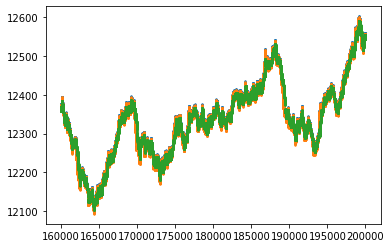

In [5]:
plt.scatter(iindex[160000:200000],aask[160000:200000],s=2)
plt.scatter(iindex[160000:200000],bbid[160000:200000],s=2)
plt.scatter(iindex[160000:200000],bbf1[160000:200000],s=2)

In [6]:
begin = 50000
end = 580000
size = end - begin
print(size)

530000


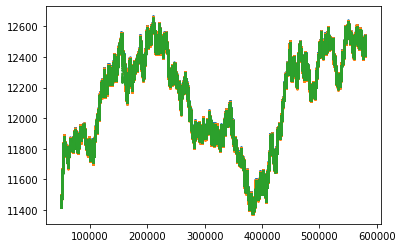

In [7]:
plt.scatter(iindex[begin:end],aask[begin:end],s=2)
plt.scatter(iindex[begin:end],bbid[begin:end],s=2)
plt.scatter(iindex[begin:end],bbf1[begin:end],s=2)

In [8]:
#remove the elements before the ask filters' complete convergence

iindexx = np.delete(iindex ,[r for r in range(end,len(iindex))])
aaskk = np.delete(aask ,[r for r in range(end,len(iindex))])
bbidd = np.delete(bbid ,[r for r in range(end,len(iindex))])
aaf11 = np.delete(aaf1 ,[r for r in range(end,len(iindex))])
aaf22 = np.delete(aaf2 ,[r for r in range(end,len(iindex))])
aaf33 = np.delete(aaf3 ,[r for r in range(end,len(iindex))])
aaf44 = np.delete(aaf4 ,[r for r in range(end,len(iindex))])
aaf55 = np.delete(aaf5 ,[r for r in range(end,len(iindex))])
bbf11 = np.delete(bbf1 ,[r for r in range(end,len(iindex))])
bbf22 = np.delete(bbf2 ,[r for r in range(end,len(iindex))])
bbf33 = np.delete(bbf3 ,[r for r in range(end,len(iindex))])
bbf44 = np.delete(bbf4 ,[r for r in range(end,len(iindex))])
bbf55 = np.delete(bbf5 ,[r for r in range(end,len(iindex))])

bid = np.delete(bbidd,[i for i in range(0,begin)])
ask = np.delete(aaskk,[i for i in range(0,begin)])
af1 = np.delete(aaf11,[i for i in range(0,begin)])
af2 = np.delete(aaf22,[i for i in range(0,begin)])
af3 = np.delete(aaf33,[i for i in range(0,begin)])
af4 = np.delete(aaf44,[i for i in range(0,begin)])
af5 = np.delete(aaf55,[i for i in range(0,begin)])
bf1 = np.delete(bbf11,[i for i in range(0,begin)])
bf2 = np.delete(bbf22,[i for i in range(0,begin)])
bf3 = np.delete(bbf33,[i for i in range(0,begin)])
bf4 = np.delete(bbf44,[i for i in range(0,begin)])
bf5 = np.delete(bbf55,[i for i in range(0,begin)])
index = np.delete(iindexx,[i for i in range(0,begin)])

In [9]:
#defining arrays that represent each ask filter's distance from the ask price

adelta = [ask[i]-ask[i-1] for i in range(0,len(ask))]
bdelta = [bid[i]-bid[i-1] for i in range(0,len(ask))]
af1delta = [af1[i]-af1[i-1] for i in range(0,len(ask))]
bf1delta = [bf1[i]-bf1[i-1] for i in range(0,len(ask))]
af2delta = [af2[i]-af2[i-1] for i in range(0,len(ask))]
bf2delta = [bf2[i]-bf2[i-1] for i in range(0,len(ask))]
af3delta = [af3[i]-af3[i-1] for i in range(0,len(ask))]
bf3delta = [bf3[i]-bf3[i-1] for i in range(0,len(ask))]
af4delta = [af4[i]-af4[i-1] for i in range(0,len(ask))]
bf4delta = [bf4[i]-bf4[i-1] for i in range(0,len(ask))]
af5delta = [af5[i]-af5[i-1] for i in range(0,len(ask))]
bf5delta = [bf5[i]-bf5[i-1] for i in range(0,len(ask))]
daf1 = [af1[i]-ask[i] for i in range(0,len(ask))]
daf2 = [af2[i]-ask[i] for i in range(0,len(ask))]
daf3 = [af3[i]-ask[i] for i in range(0,len(ask))]
daf4 = [af4[i]-ask[i] for i in range(0,len(ask))]
daf5 = [af5[i]-ask[i] for i in range(0,len(ask))]
dbf1 = [bf1[i]-bid[i] for i in range(0,len(bid))]
dbf2 = [bf2[i]-bid[i] for i in range(0,len(bid))]
dbf3 = [bf3[i]-bid[i] for i in range(0,len(bid))]
dbf4 = [bf4[i]-bid[i] for i in range(0,len(bid))]
dbf5 = [bf5[i]-bid[i] for i in range(0,len(bid))]
spread = [ask[i]-bid[i] for i in range(0,len(ask))]

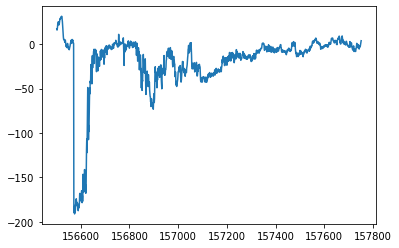

In [10]:
plt.plot(index[106500:107750],dbf1[106500:107750])

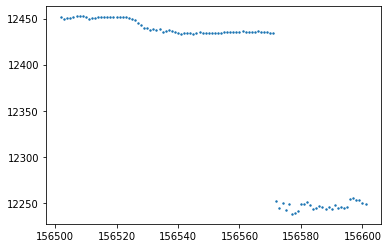

In [11]:
plt.scatter(index[106500:106600],bf1[106500:106600],s=2)

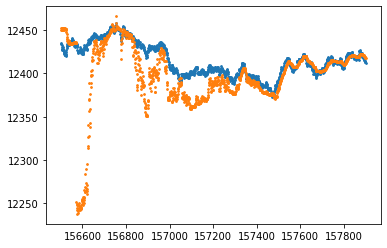

In [12]:
plt.scatter(index[106500:107900],bid[106500:107900],s=3)
plt.scatter(index[106500:107900],bf1[106500:107900],s=3)

In [13]:
r = bid[1:size]
rp = bf1[1:size]
ind = []
indc = []

for i in range(1,size-1):

    if r[i] < rp[i]:
        if r[i-1] > rp[i-1]:
            ind.append(i)

    if r[i] > rp[i]:
        if r[i-1] < rp[i-1]:
            indc.append(i)

print(ind[0])
print(indc[len(indc)-1])

8
529996


In [14]:
ind.pop(len(ind)-1)

529998

In [15]:
print(len(ind))
print(len(indc))

25274
25274


In [16]:
print(ind[len(ind)-1],indc[len(indc)-1])

529995 529996


In [17]:
ind.pop()

529995

In [18]:
#return function of desired signals

ret = []

for i in range(len(ind)):
    
    if bid[indc[i]]-bid[ind[i]] < ((spread[indc[i]]+spread[ind[i]])*(-1)):
        
        for e in range(ind[i],indc[i]):
            
            ret.append(bdelta[e]*(-1))


    if bid[indc[i]]-bid[ind[i]] > ((spread[indc[i]]+spread[ind[i]])*(-1)):
        
        for e in range(ind[i],indc[i]):
            
            ret.append(0)
            
    if bid[indc[i]]-bid[ind[i]] == ((spread[indc[i]]+spread[ind[i]])*(-1)):
        
        for e in range(ind[i],indc[i]):
            
            ret.append(0)
    
    
#transaction costs

ew = [0 for m in range(len(ret))]

for i in range(len(ret)):
    if ret[i-1] == 0:
        if ret[i] is not 0:
            ew[i] = ret[i] - spread[i]
    
    if ret[i-1] is not 0:
        if ret[i] == 0:
            ew[i] = ret[i] - spread[i]
            
            
for i in range(len(ret)):
    if ret[i-1] == 0:
        if ret[i] is not 0:
            ret[i] = ew[i]
    
    if ret[i-1] is not 0:
        if ret[i] == 0:
            ret[i] = ew[i]
            
returns = [0 for m in range(529999)]

for i in range(len(ret)):
    
    returns[i] = ret[i]

    


In [19]:
#predictions to train the neural network

rettt = []

for i in range(len(ind)):
    
    if bid[indc[i]]-bid[ind[i]] < ((spread[indc[i]]+spread[ind[i]])*(-1)):
        
        for e in range(ind[i],indc[i]):
            
            rettt.append(1)


    if bid[indc[i]]-bid[ind[i]] > ((spread[indc[i]]+spread[ind[i]])*(-1)):
        
        for e in range(ind[i],indc[i]):
            
            rettt.append(0)
            
    if bid[indc[i]]-bid[ind[i]] == ((spread[indc[i]]+spread[ind[i]])*(-1)):
        
        for e in range(ind[i],indc[i]):
            
            rettt.append(0)
    
            
            
output = [0 for m in range(529999)]

for i in range(len(rettt)):
    
    output[i] = rettt[i]


In [20]:
for i in range(len(indc)-2):
    
    for e in range(indc[i],ind[i+1]):
            
            output.insert(e,0)

In [21]:
outputs = np.array(output)

In [22]:
print(len(outputs))

797827


In [23]:
for i in range(len(indc)-2):
    
    for e in range(indc[i],ind[i+1]):
            
            returns.insert(e,0)

In [24]:
retu = np.array(returns)

In [25]:
w = [m for m in range(len(retu))]

In [26]:
print(len(outputs),len(retu))

797827 797827


In [27]:
print("Hello World!")

Hello World!


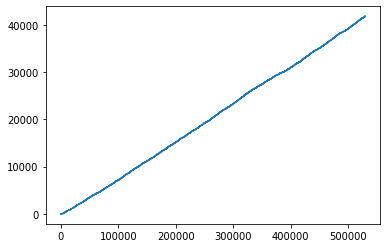

In [28]:
plt.plot(w[0:529999],retu[0:529999].cumsum())

In [29]:
delthese = [m for m in range(529999,len(outputs)-1)]

newoutputs = np.delete(outputs, delthese)
    

In [30]:
delthesee = [m for m in range(529999,len(outputs)-1)]

newoutputss = np.delete(outputs, delthesee)

In [31]:
print(len(newoutputs),len(retu))

530000 797827


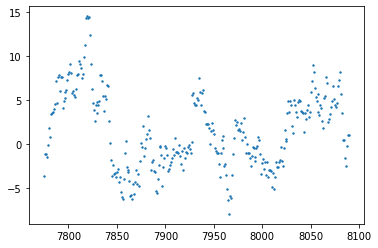

In [32]:
plt.scatter(w[7775:8090],dbf1[7775:8090],s=2)

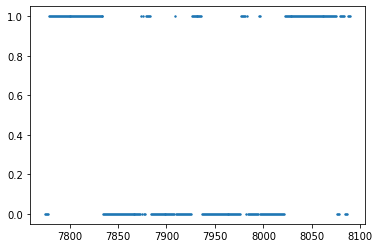

In [33]:
plt.scatter(w[7775:8090],newoutputs[7775:8090],s=2)

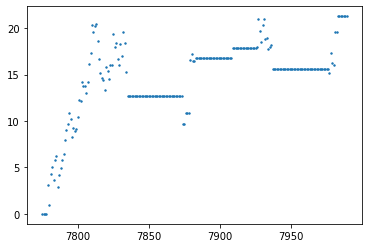

In [34]:
plt.scatter(w[7775:7990],retu[7775:7990].cumsum(),s=2)

In [35]:
def arma(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    arma = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period,len(x)):
            
            arma[i-max_period,r-min_period] = sum(x[i-r:i])/r
    
    return arma

In [37]:
print(len(dbf1)-100)

529900


In [34]:
avg = arma(dbf1, 5, 100)
print(len(avg))

529900


In [35]:
np.save('arithmetic_avgs_periods_5-100',avg)

In [40]:
avgg = np.load('/kaggle/working/arithmetic_avgs_periods_5to100.npy')

In [39]:
print(len(avgg))

529900


In [35]:
print(len(avg))

529900


In [38]:
def time_embed_one(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    dbf_embedded_one = np.zeros((end_index,periods))
    
    



#computes the finite differences of the series

def finitedifferences(x):
    
    differences = [x[i] - x[i-1] for i in range(1,len(x))]
    
    differences = np.array(differences)
    
    return differences




#computes the arithmetic average of the previous x, specified number, timesteps

def arma(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    arma = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period,len(x)):
            
            arma[i-max_period,r-min_period] = sum(x[i-r:i])/r
    
    return arma




#computes the deviation from the arithmetic average of the previous x, specified number, timesteps

def devarma(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    devarma = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period,len(x)):
            
            devarma[i-max_period,r-min_period] = x[i]-avgs[i-max_period,r-min_period]  #assumes that you've stored the arithmetic averages under the name 'avgs'
    
    return devarma




#computes the average of the previous x, specified number, timesteps. computed with a specific kernel

#def exma(x, min_period, max_period):
    
    #end_index = len(x)-max_period
    #periods = max_period-min_period
    #exma = np.zeros((end_index,periods))
    
    #for r in range(min_period,max_period):
        
        #for i in range(max_period,len(x)):
            
            #exma[i-max_period,r-min_period] = 
    
   # return exma




# time-delay embedding function

def td_embedding(x, period):
    
    embedded_series = np.zeros((len(x),period))
    
    for i in range(period,len(x)):
        
        for o in range(0,period):
            
            embedded_series[i,o] = x[i-o]
            
    
    return embedded_series




#computes the minimum of the last x, specified number, timesteps

def minimum(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    mini = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
            
            mini[i-max_period,r-min_period] = min(x[i-r:i])
        
    return mini




#computes the maximum of the last x, specified number, timesteps

def maximum(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    maximum = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
        
            maximum[i-max_period,r-min_period] = max(x[i-r:i])
        
    return maximum




#computes the standard deviation of the last x, specified number, timesteps

def stdev(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    stdev = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
        
            stdev[i-max_period,r-min_period] = np.sqrt(var[i-max_period,r-min_period]) #assumes that you've stored the variances under the name 'var'
        
    return stdev




#computes the second moment of the distribution (variance) for the last specified timesteps

def variance(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    variance = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
        
            variance[i-max_period,r-min_period] = moment(x[i-r:i], moment=2)
        
    return variance

    

    
#computes the third moment of the distribution (skewness) for the last specified timesteps
    
def skewness(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    skewness = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
        
            skewness[i-max_period,r-min_period] = moment(x[i-r:i], moment=3)
        
    return skewness




#computes the fourth moment of the distribution (kurtosis) for the last specified timesteps

def kurtosis(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    kurtosis = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
        
            kurtosis[i-max_period,r-min_period] = moment(x[i-r:i], moment=4)
        
    return kurtosis




#computes the fifth moment of the distribution (pearson skewness coefficient) for the last specified timesteps

def psc(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    psc = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
        
            psc[i-max_period,r-min_period] = moment(x[i-r:i], moment=5)
        
    return psc




#computes the sixth moment of the distribution (pearson kurtosis coefficient) for the last specified timesteps

def pkc(x, min_period, max_period):
    
    end_index = len(x)-max_period
    periods = max_period-min_period
    pkc = np.zeros((end_index,periods))
    
    for r in range(min_period,max_period):
        
        for i in range(max_period, len(x)):
        
            pkc[i-max_period,r-min_period] = moment(x[i-r:i], moment=6)
        
    return pkc

In [36]:
mu6 = pkc(dbf1,5,100)

In [38]:
print(len(mu6[0])) 

95


In [40]:
from IPython.display import HTML

In [41]:
np.save('mu6.npy',mu6)
display(HTML('<a href="./mu6.npy" download>Download numpy array</a>'))

In [33]:
var = variance(dbf1,5,100)
findif = finitedifferences(dbf1)
devar = devarma(dbf1,5,100)
mini = minimum(dbf1,5,100)
maxi = maximum(dbf1,5,100)
standard_devation = stdev(dbf1,5,100)
skew = skewness(dbf1,5,100)
kurt = kurtosis(dbf1,5,100)
mu5 = psc(dbf1,5,100)
mu6 = pkc(dbf1,5,100)

IndexError: list assignment index out of range

In [34]:
print(dbf1[0])

-7.179369999999835


In [67]:
random_initializer = tf.keras.initializers.RandomUniform(minval=-1, maxval=1)
normal_initializer1 = tf.keras.initializers.RandomNormal(mean=0., stddev=0.01)
normal_initializer2 = tf.keras.initializers.RandomNormal(mean=0., stddev=0.33)
normal_initializer3 = tf.keras.initializers.RandomNormal(mean=0., stddev=0.66)
normal_initializer4 = tf.keras.initializers.RandomNormal(mean=0., stddev=1)
normal_initializer5 = tf.keras.initializers.RandomNormal(mean=0.2, stddev=0.33)
normal_initializer6 = tf.keras.initializers.RandomNormal(mean=0.2, stddev=0.66)
normal_initializer7 = tf.keras.initializers.RandomNormal(mean=0.2, stddev=1.)
normal_initializer8 = tf.keras.initializers.RandomNormal(mean=0.4, stddev=0.33)
normal_initializer9 = tf.keras.initializers.RandomNormal(mean=0.4, stddev=0.66)
normal_initializer10 = tf.keras.initializers.RandomNormal(mean=0.4, stddev=1.)
normal_initializer11 = tf.keras.initializers.RandomNormal(mean=0.6, stddev=0.33)
normal_initializer12 = tf.keras.initializers.RandomNormal(mean=0.6, stddev=0.66)
normal_initializer13 = tf.keras.initializers.RandomNormal(mean=0.6, stddev=1.)
normal_initializer14 = tf.keras.initializers.RandomNormal(mean=0.8, stddev=0.33)
normal_initializer15 = tf.keras.initializers.RandomNormal(mean=0.8, stddev=0.66)
normal_initializer16 = tf.keras.initializers.RandomNormal(mean=0.8, stddev=1.)
normal_initializer17 = tf.keras.initializers.RandomNormal(mean=-0.2, stddev=0.33)
normal_initializer18 = tf.keras.initializers.RandomNormal(mean=-0.2, stddev=0.66)
normal_initializer19 = tf.keras.initializers.RandomNormal(mean=-0.2, stddev=1.)
normal_initializer20 = tf.keras.initializers.RandomNormal(mean=-0.4, stddev=0.33)
normal_initializer21 = tf.keras.initializers.RandomNormal(mean=-0.4, stddev=0.66)
normal_initializer22 = tf.keras.initializers.RandomNormal(mean=-0.4, stddev=1.)
normal_initializer23 = tf.keras.initializers.RandomNormal(mean=-0.6, stddev=0.33)
normal_initializer24 = tf.keras.initializers.RandomNormal(mean=-0.6, stddev=0.66)
normal_initializer25 = tf.keras.initializers.RandomNormal(mean=-0.6, stddev=1.)
normal_initializer26 = tf.keras.initializers.RandomNormal(mean=-0.8, stddev=0.33)
normal_initializer27 = tf.keras.initializers.RandomNormal(mean=-0.8, stddev=0.66)
normal_initializer28 = tf.keras.initializers.RandomNormal(mean=-0.8, stddev=1.)
normal_initializer29 = tf.keras.initializers.RandomNormal(mean=0., stddev=2.)
normal_initializer30 = tf.keras.initializers.RandomNormal(mean=0., stddev=3.)
glorot1 = tf.keras.initializers.GlorotNormal()
ones = tf.keras.initializers.Ones()
zeros = tf.keras.initializers.Zeros()
tr_normal1 = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=None)
tr_normal2 = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.25, seed=None)
tr_normal3 = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.5, seed=None)
tr_normal4 = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=0.75, seed=None)
tr_normal5 = tf.keras.initializers.TruncatedNormal(mean=0.0, stddev=1, seed=None)
tr_normal6 = tf.keras.initializers.TruncatedNormal(mean=0.5, stddev=0.05, seed=None)
tr_normal7 = tf.keras.initializers.TruncatedNormal(mean=0.5, stddev=0.25, seed=None)
tr_normal8 = tf.keras.initializers.TruncatedNormal(mean=0.5, stddev=0.5, seed=None)
tr_normal9 = tf.keras.initializers.TruncatedNormal(mean=0.5, stddev=0.75, seed=None)
tr_normal10 = tf.keras.initializers.TruncatedNormal(mean=0.5, stddev=1, seed=None)
tr_normal11 = tf.keras.initializers.TruncatedNormal(mean=1, stddev=0.05, seed=None)
tr_normal12 = tf.keras.initializers.TruncatedNormal(mean=1, stddev=0.25, seed=None)
tr_normal13 = tf.keras.initializers.TruncatedNormal(mean=1, stddev=0.5, seed=None)
tr_normal14 = tf.keras.initializers.TruncatedNormal(mean=1, stddev=0.75, seed=None)
tr_normal15 = tf.keras.initializers.TruncatedNormal(mean=1, stddev=1, seed=None)
tr_normal16 = tf.keras.initializers.TruncatedNormal(mean=-0.5, stddev=0.05, seed=None)
tr_normal17 = tf.keras.initializers.TruncatedNormal(mean=-0.5, stddev=0.25, seed=None)
tr_normal18 = tf.keras.initializers.TruncatedNormal(mean=-0.5, stddev=0.5, seed=None)
tr_normal19 = tf.keras.initializers.TruncatedNormal(mean=-0.5, stddev=0.75, seed=None)
tr_normal20 = tf.keras.initializers.TruncatedNormal(mean=-0.5, stddev=1, seed=None)
tr_normal21 = tf.keras.initializers.TruncatedNormal(mean=-1, stddev=0.05, seed=None)
tr_normal22 = tf.keras.initializers.TruncatedNormal(mean=-1, stddev=0.25, seed=None)
tr_normal23 = tf.keras.initializers.TruncatedNormal(mean=-1, stddev=0.5, seed=None)
tr_normal24 = tf.keras.initializers.TruncatedNormal(mean=-1, stddev=0.75, seed=None)
tr_normal25 = tf.keras.initializers.TruncatedNormal(mean=-1, stddev=1, seed=None)
henormal = tf.keras.initializers.HeNormal()
heuniform = tf.keras.initializers.HeUniform()
orthog = tf.keras.initializers.Orthogonal()


In [ ]:
def extract(timesteps):
    
    

In [68]:
def preprocess(timesteps):
 
    dat = np.zeros((size,timesteps))
    
    for i in range(size):
        for e in range(timesteps):
            dat[i,e] = dbf1[i-e]
            
    return dat

In [69]:
def training_x(elements):
    
    #delthese = [m for m in range((len(preprocessed_dbf1)-1)-elements,len(preprocessed_dbf1)-1)]

    train_x = preprocessed_dbf1[0:len(preprocessed_dbf1)-elements]
    
    return train_x

In [70]:
def training_y(elements):
    
    delthese = [m for m in range((len(newoutputs)-1)-elements,len(newoutputs)-1)]
    
    train_y = np.delete(newoutputs, delthese)
    
    return train_y

In [71]:
def validation_x(elements):
    
    dat = np.zeros((elements,10))
    
    for i in range(0,elements):
        for e in range(0,10):
            
            dat[i,e] = preprocessed_dbf1[(len(preprocessed_dbf1)-elements)+i,e]
        
    return dat

In [72]:
def validation_y(elements):
    
    dat = np.zeros(elements)
    
    for i in range(0,elements):
        
        dat[i] = newoutputs[(len(newoutputs)-elements)+i]
        
    return dat

In [73]:
def steepsigmoid(x):

    return 1/(1+tf.exp(-4*x))

get_custom_objects().update({'steepsigmoid': Activation(steepsigmoid)})

In [74]:
def ff_nn(units, layers, actvn, kernel_init, bias_init):
    
    model = tf.keras.Sequential()
    
    #input layer

    model.add(Dense(10, input_shape=(10,), activation='tanh', use_bias=False, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    #hidden layers
    for i in range(layers):
        model.add(Dense(units, activation=actvn, use_bias=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
        #if i % 4 == 0:
            #model.add(Dropout(0.1))
    #model.add(Dense(30, activation='tanh'))
    
    #output layer
    model.add(Dense(1, activation='sigmoid'))
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    #compile neural net
    model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['binary_accuracy'])

    return model

In [75]:
def convnet():
        
    model = tf.keras.Sequential()

    # Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(10,1)))

    # Add another convolutional layer with 64 filters and a 3x3 kernel
    model.add(Conv1D(128, kernel_size=5, activation='relu', strides=1))
    
    
    # Add a max pooling layer with a 2x2 pool sizee
    model.add(MaxPooling1D(pool_size=1))
    
    # Add another max pooling layerw

    # Flatten the output from the convolutional layers
    model.add(Flatten())

    # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(256, activation='relu'))
    
    # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(128, activation='relu'))
    
    # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.3))
    
    # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(128, activation='relu'))
    
    # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(128, activation='relu'))
    
    # Add a fully connected layer with 128 neurons and ReLU activation
    model.add(Dense(128, activation='relu'))
    
    model.add(Dropout(0.3))
    
    # Add an output layer with 10 neurons and softmax activation
    model.add(Dense(1, activation='sigmoid'))

    
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    #compile neural net
    model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['binary_accuracy'])

    return model

In [35]:
modell = convnet()
modell.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 128)            768       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2, 128)            82048     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 128)            0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

2023-02-21 15:31:58.078356: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-21 15:31:58.082158: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-02-21 15:31:58.082199: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-21 15:31:58.082257: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (35cf3efa417d): /proc/driver/nvidia/version does not exist
2023-02-21 15:31:58.083493: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [ ]:
model.predict(pre)

In [ ]:
def lstm(units, kernel_init, bias_init):
    
    model = tf.keras.Sequential()
    # Add 5 LSTM layers with 10 LSTM cells in each layer
    
    model.add(LSTM(units, activation='elu', input_shape=(10, 1), return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
              
    #for i in range(layers):
    model.add(LSTM(units, activation='elu', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    model.add(Dropout(0.1))

    model.add(LSTM(units, activation='elu', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    model.add(LSTM(units, activation='elu', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    model.add(Dropout(0.1))
    
    model.add(LSTM(units, activation='elu', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    model.add(LSTM(units, activation='elu', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    model.add(Dropout(0.1))
    
    model.add(LSTM(units, activation='elu', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
        
    model.add(LSTM(units, activation='tanh', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    model.add(Dropout(0.1))
    
    model.add(LSTM(units, activation='tanh', return_sequences=True, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
    model.add(LSTM(units, activation='sigmoid', return_sequences=False, kernel_initializer=kernel_init, bias_initializer=bias_init))
    
        
    # Add a single output neuron with a binary step activation function
    model.add(Dense(1, activation='steepsigmoid'))
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.0005)
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_accuracy'])
    
    return model

In [ ]:
model = lstm(40, henormal, henormal)
model.summary()

In [43]:
preprocessed_dbf1 = preprocess(10)
print(preprocessed_dbf1[0:3])

[[-7.17937  0.50514 -2.06805 -0.14061  1.0988  -0.45065 -0.75374 -0.09029
   2.1851   0.86375]
 [-8.61658 -7.17937  0.50514 -2.06805 -0.14061  1.0988  -0.45065 -0.75374
  -0.09029  2.1851 ]
 [-8.31315 -8.61658 -7.17937  0.50514 -2.06805 -0.14061  1.0988  -0.45065
  -0.75374 -0.09029]]


In [44]:
reshaped_data = preprocessed_dbf1.reshape((530000,10,1))

In [47]:
r = modell.predict_on_batch(reshaped_data)

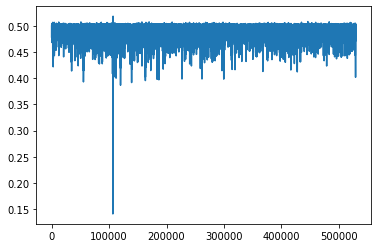

In [48]:
plt.plot(r)

In [47]:
training_h = modell.fit(reshaped_data, newoutputs, batch_size=512, epochs=5000, validation_split=0.25, verbose=1)

Epoch 1/10000
777/777 [==============================] - 5s 5ms/step - loss: 0.3608 - binary_accuracy: 0.8256 - val_loss: 0.3576 - val_binary_accuracy: 0.8256
Epoch 2/10000
505/777 [==================>...........] - ETA: 1s - loss: 0.3382 - binary_accuracy: 0.8358

KeyboardInterrupt: 

In [ ]:
print(reshaped_data[2])

In [ ]:
lstm_train_x = reshaped_data[0:320000]
lstm_valid_x = reshaped_data[320000:530000]

In [ ]:
print(lstm_train_x[len(lstm_train_x)-1],lstm_valid_x[0])

In [ ]:
iter8 = 10

In [ ]:
elements = 210000
    
train_x = training_x(elements)
train_y = training_y(elements)
valid_x = validation_x(elements)
valid_y = validation_y(elements)

In [ ]:
print(len(valid_x))

In [ ]:
plt.plot(valid_y[0:1000])

In [ ]:
plt.plot(newoutputs[len(train_y):len(train_y)+1000])

In [ ]:
print(preprocessed_dbf1[len(train_x)])

In [ ]:
def trainontpu(iter8):
    # detect and init the TPU  
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()  
    # instantiate a distribution strategy
    tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu) 

    with tpu_strategy.scope(): 
    
        y = convnet()
        #best_val_acc = 0
        #y.load_weights('/kaggle/working/best_dbf1_weights_vol751s.h5')
        for i in tqdm(range(0,iter8)):
            
            checkpoint_filepath = '/kaggle/working/best_dbf1_weights_vol751s.h5'
            model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                                           save_weights_only=True, 
                                                                           monitor='val_binary_accuracy',
                                                                           mode='max',
                                                                           save_best_only=True,
                                                                           verbose=0)
            
            training_h = y.fit(reshaped_data, newoutputs, 
                               batch_size=512, epochs=5000, validation_split=0.25,
                               verbose=1)
            
            
            #plt.plot(training_h.history['val_binary_accuracy']) 
            plt.plot(training_h.history['binary_accuracy']) 
        
    return y

In [ ]:
#y = ff_nn(100,30,'tanh',henormal,henormal) 
#y.load_weights('/kaggle/working/best_dbf1_weights_vol751s.h5')

def trainoncpu(iter8):
    
    y = ff_nn(80,20,'tanh',henormal,henormal)
        #best_val_acc = 0
        #y.load_weights('/kaggle/working/best_dbf1_weights_vol751s.h5')
    for i in tqdm(range(0,iter8)):
        
        checkpoint_filepath = '/kaggle/working/best_dbf1_weights_vol751s.h5'
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                                        save_weights_only=True, 
                                                                        monitor='accuracy',
                                                                        mode='max',
                                                                        save_best_only=True,
                                                                        verbose=1)
            
        training_h = y.fit(train_x, train_y, 
                            batch_size=64, epochs=4000, 
                            validation_data=(valid_x, valid_y), 
                            verbose=1, callbacks=[model_checkpoint_callback])
            
            
            #plt.plot(training_h.history['val_binary_accuracy']) 
        plt.plot(training_h.history['accuracy']) 

In [49]:
def trainongpu(iter8):

    with tf.device('/GPU:0'):
    
        y = convnet()
        #best_val_acc = 0
        #y.load_weights('/kaggle/working/best_dbf1_weights_vol751s.h5')
        for i in tqdm(range(0,iter8)):
            checkpoint_filepath = '/kaggle/working/best_dbf1_weights_vol751s.h5'
            model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                                           save_weights_only=True, 
                                                                           monitor='val_binary_accuracy',
                                                                           mode='max',
                                                                           save_best_only=True,
                                                                           verbose=1)
            
            training_h = y.fit(reshaped_data, newoutputs, 
                               batch_size=512, epochs=5000, validation_split=0.25,
                               verbose=1)
            
            
            #plt.plot(training_h.history['val_binary_accuracy']) 
            plt.plot(training_h.history['accuracy']) 
        
        
    return y

In [54]:
model = trainongpu(1)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/5000
777/777 [==============================] - 6s 6ms/step - loss: 0.4806 - binary_accuracy: 0.8289 - val_loss: 0.3907 - val_binary_accuracy: 0.8298
Epoch 2/5000
777/777 [==============================] - 4s 5ms/step - loss: 0.3644 - binary_accuracy: 0.8361 - val_loss: 0.3632 - val_binary_accuracy: 0.8298
Epoch 3/5000
777/777 [==============================] - 4s 6ms/step - loss: 0.3483 - binary_accuracy: 0.8367 - val_loss: 0.3576 - val_binary_accuracy: 0.8293
Epoch 4/5000
777/777 [==============================] - 4s 5ms/step - loss: 0.3457 - binary_accuracy: 0.8354 - val_loss: 0.3550 - val_binary_accuracy: 0.8296
Epoch 5/5000
777/777 [==============================] - 5s 6ms/step - loss: 0.3420 - binary_accuracy: 0.8373 - val_loss: 0.3550 - val_binary_accuracy: 0.8297
Epoch 6/5000
777/777 [==============================] - 4s 5ms/step - loss: 0.3422 - binary_accuracy: 0.8353 - val_loss: 0.3534 - val_binary_accuracy: 0.8301
Epoch 7/5000
777/777 [==============================

KeyboardInterrupt: 

In [ ]:
w = ff_nn(100,30,'tanh',henormal,henormal)
w.load_weights('/kaggle/working/best_dbf1_weights_vol751s.h5')  

In [ ]:
w.evaluate(train_x, train_y) 

In [ ]:
preds = w.predict_on_batch(train_x)

In [ ]:
plt.scatter(index[1000:1400],preds[1000:1400],s=2)
plt.scatter(index[1000:1400],train_y[1000:1400],s=2)  

In [ ]:
morphed_preds = np.zeros(len(preds))
for i in range(0,len(preds)):
    if preds[i] > 0.5:
        morphed_preds[i] = 1
    if preds[i] < 0.5:
        morphed_preds[i] = 0

In [ ]:
#plt.plot(morphed_preds[2000:2400])
#plt.plot(preds[2000:2400])
plt.plot(train_y[2000:2400])

In [ ]:
w.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['binary_accuracy'])

In [ ]:
#checkpoint_filepath = '/kaggle/working/best_dbf1_weights_vol751s.h5'
#model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                                #save_weights_only=True, 
                                                                #monitor='binary_accuracy',
                                                                #mode='max',
                                                                #save_best_only=True,
                                                                #verbose=1)
            
training_h = w.fit(train_x, train_y, 
                    batch_size=65536, epochs=1000, 
                    #validation_data=(valid_x, valid_y), 
                    verbose=1)

In [ ]:
plt.plot(training_h.history['val_binary_accuracy'])
plt.plot(training_h.history['binary_accuracy']) 

In [ ]:
checkpoint_filepath = '/kaggle/working/saved_weights'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=True, monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

# detect and init the TPU  
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()  
# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu) 

with tpu_strategy.scope(): 
 
    #m = ff_nn(100,30,'tanh',normal_initializer29,normal_initializer29) 
    y = ff_nn(100,30,'tanh',henormal,henormal)
    th = y.fit(preprocessed_dbf1, newoutputs, batch_size=65536, validation_data=(valid_x, valid_y), epochs=2000, verbose=1)

In [ ]:
val_acc = np.argmax(th.history['val_binary_accuracy'])+1
best_weights = y.get_weights() 
y.load_weights(f"model_weights_epoch_1983.h5") 

In [ ]:
print(val_acc)

In [ ]:
y.evaluate(valid_x, valid_y)

In [ ]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() 
# instantiate a distribution strategy 
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
   
with tpu_strategy.scope(): 
 
    #m = ff_nn(100,30,'tanh',normal_initializer29,normal_initializer29)
    y = lstm(90,50,'tanh',henormal,henormal)
    y.fit(reshaped_data, newoutputs, batch_size=65536, epochs=6000,verbose=1, callbacks=[callback])

In [ ]:
predictions = y.predict_on_batch(reshaped_data)

In [ ]:
print(math.exp(-200*2))

In [ ]:
with tf.device('/GPU:0'):
    
    y = ff_nn(100,30,'tanh',henormal,henormal)
    best_val_acc = 0

        
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',patience=500, verbose=1)
    training_h = y.fit(train_x, train_y, batch_size=65536, epochs=4000, validation_data=(valid_x, valid_y), verbose=1, callbacks=[callback])
    val_acc = np.max(training_h.history['val_binary_accuracy']) 
    plt.plot(training_h.history['val_binary_accuracy']) 